In [62]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout, Activation, Dense, Flatten
from keras.layers.convolutional import Convolution1D,AveragePooling1D,MaxPooling1D
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims

In [63]:
Val=pd.read_csv('WXProjectWholeData.csv').T
num=3
Tem=[300,600,800]
for k in range(3):
    for j in range(num):
        Tem.insert(j+1,(Tem[j]+Tem[j+1])/2)
for k in range(3):
    for j in range(num):
        Tem.insert(-j-1,(Tem[-j-1]+Tem[-j-2])/2)
print(Tem)
len(Tem)
X_train, X_test, y_train, y_test = train_test_split(Val.values, Tem, test_size=0.15, random_state=13)
y_train = np.array(y_train)
y_train = y_train.reshape(y_train.shape + (1,))

[300, 337.5, 356.25, 365.625, 375.0, 412.5, 431.25, 450.0, 525.0, 562.5, 600, 625.0, 650.0, 700.0, 712.5, 725.0, 750.0, 756.25, 762.5, 775.0, 800]


In [189]:
model = Sequential()
activation = 'relu'
model.add(Dense(64, input_dim = X_train.shape[1],activation=activation))
model.add(Dense(128, activation=activation))
model.add(Dense(64, activation=activation))
model.add(Dense(64, activation=activation))
model.add(Dense(1, activation=activation))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
print(model.summary())

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 64)                34688     
_________________________________________________________________
dense_30 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 65        
Total params: 55,489
Trainable params: 55,489
Non-trainable params: 0
_________________________________________________________________
None


In [190]:
weights='3Weights-2489--1.32339.hdf5'
model.load_weights(weights)

In [232]:
ori=np.array(Val.values)
ori

array([[-3.72573464e-06,  4.52599782e-06,  2.90884735e-06, ...,
         5.09579103e-06,  4.92752643e-06,  8.18467060e-06],
       [-3.90207983e-06,  4.17984712e-06,  2.00002552e-06, ...,
         4.87335934e-06,  5.35332644e-06,  6.17519148e-06],
       [-3.99025243e-06,  4.00677177e-06,  1.54561461e-06, ...,
         4.76214350e-06,  5.56622645e-06,  5.17045192e-06],
       ...,
       [-6.99032362e-07, -7.90589418e-06, -2.08097165e-06, ...,
        -1.42306346e-05, -3.08746868e-06, -1.94764019e-05],
       [-3.57688991e-07, -8.64917775e-06, -1.90552891e-06, ...,
        -1.55804017e-05, -3.96603755e-06, -2.03675742e-05],
       [ 3.24997752e-07, -1.01357449e-05, -1.55464343e-06, ...,
        -1.82799358e-05, -5.72317528e-06, -2.21499187e-05]])

In [233]:
from keras.models import Model
ixs=[0,1,2,3]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

In [234]:
fea=model.predict(ori)

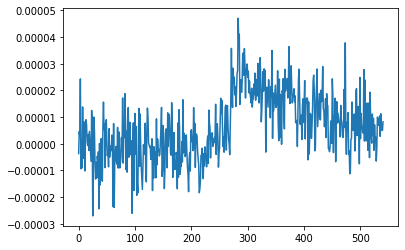

In [235]:
plt.plot(fea[0][0])

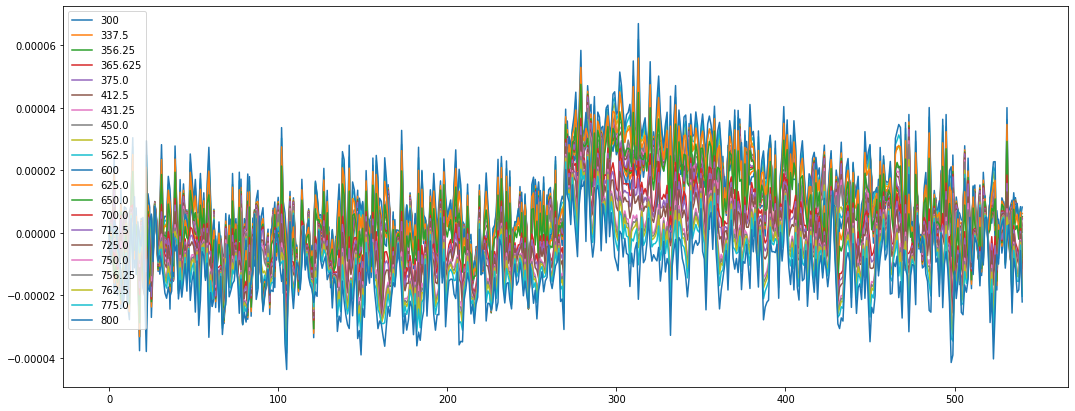

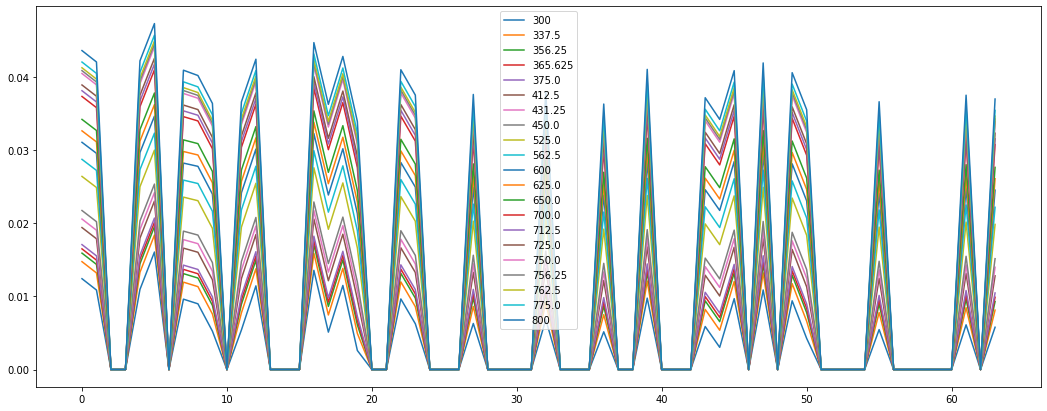

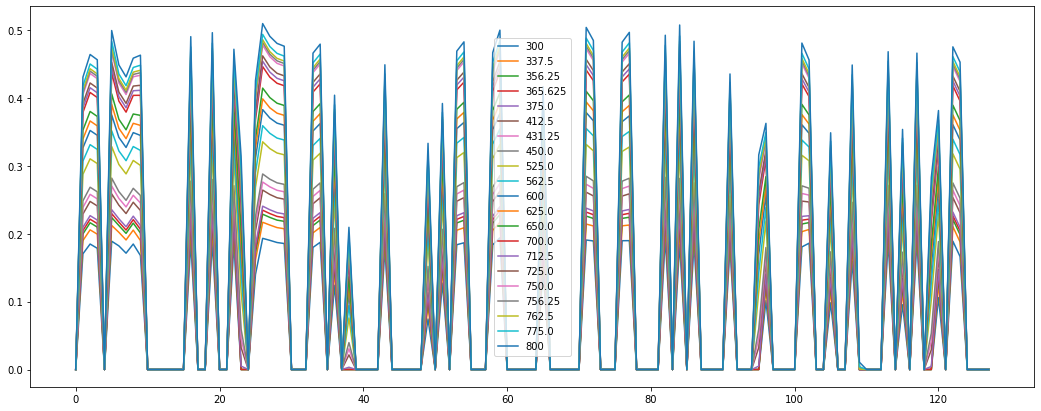

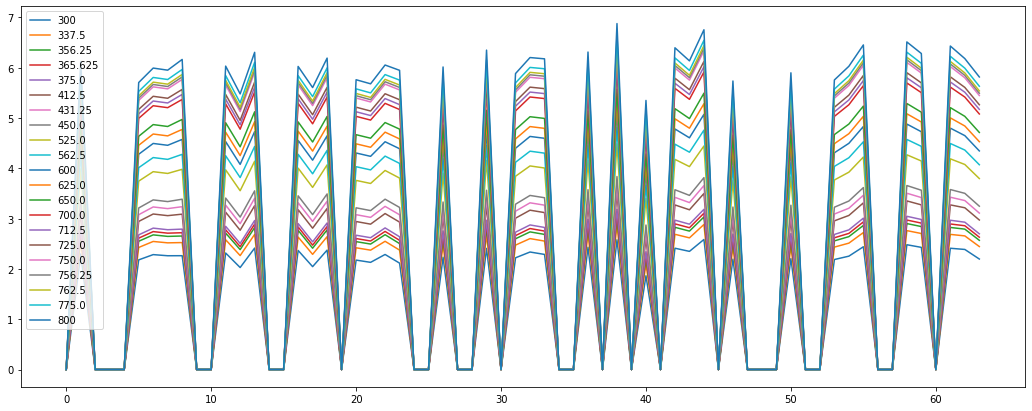

In [237]:
label=Tem
for i in range(len(fea)):
    fig= plt.figure(figsize=(18,7))
    for j in range(len(fea[0])):
        plt.plot(fea[i][j],label=label[j])
        plt.legend()

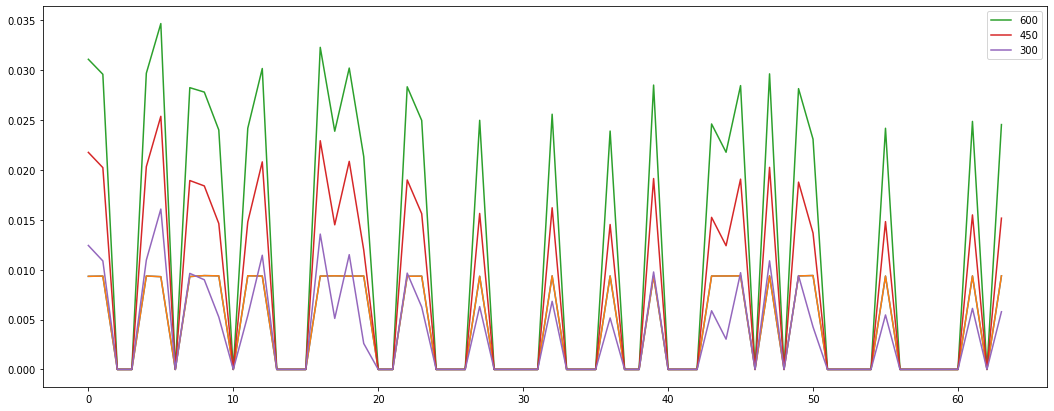

In [34]:
fig= plt.figure(figsize=(18,7))
plt.plot(fea[1][2]-fea[1][1])
plt.plot(fea[1][1]-fea[1][0])
plt.plot(fea[1][2],label=label[2])
plt.plot(fea[1][1],label=label[1])
plt.plot(fea[1][0],label=label[0])
plt.legend()

In [99]:
D800=fea[1][4]
D450=fea[1][1]
D600=fea[1][2]
D750=fea[1][3]
D300=fea[1][0]
label=[300,450,600,750,800]
tol=[D300,D450,D600,D750,D800]
def R0(D):
    new=[]
    for i in D:
        if i>1e-5:
            new.append(i)
    f=np.array(new)
    return f
F={}
co=0
for j in tol:
    F['{}K'.format(label[co])]=j
    co+=1
df=DataFrame(F)
df

,300K,450K,600K,750K,800K
0,0.012422,0.021751,0.031079,0.037355,0.043630
1,0.010871,0.020224,0.029576,0.035824,0.042071
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.010954,0.020318,0.029681,0.035953,0.042225
...,...,...,...,...,...
59,0.000000,0.000000,0.000000,0.000000,0.000000
60,0.000008,0.000000,0.000000,0.000000,0.000000
61,0.006116,0.015486,0.024855,0.031192,0.037528
62,0.000000,0.000000,0.000000,0.000000,0.000000


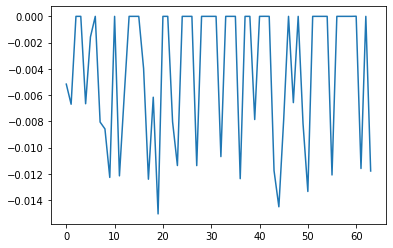

In [101]:
from scipy import stats
#for jj in range(1,4):  
x=np.array([300,450,600,750,800])
new=[]
for jj in range(1,df.shape[0]+1):
    y=df.iloc[jj-1:jj].values[0]

    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    new.append(intercept)
plt.plot(new)
#plt.plot(df.iloc[:,0:1])

In [113]:
filters, biases = model.layers[1].get_weights()
filters.shape

(541, 64)

In [258]:
ff={}
ff1={}
for i in range(len(fea[1])-1):
    ff['{}K'.format(Tem[i])]=fea[1][i]
    ff1['{}K'.format(Tem[i])]=fea[2][i]
df=DataFrame(ff)
df.to_csv('FeatureMap1.csv')
df1=DataFrame(ff1)
df1.to_csv('FeatureMap2.csv')